In [1]:
%matplotlib inline
from CartPole import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

# Task 2

In [2]:
plot_path = 'plots/Task2/'
index_to_variable = {0 : 'cart_location', 1 : 'cart_velocity', 2 : 'pole_angle', 3 : 'pole_velocity', 4 : 'action'}
index_pair_list = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3],[0,4],[1,4],[2,4],[3,4]]
no_samples = 20
x_range_for_index = {0 : np.linspace(-5,5,no_samples), 1 : np.linspace(-10,10,no_samples), 
                     2 : np.linspace(-np.pi,np.pi,no_samples), 3 : np.linspace(-15,15,no_samples), 
                     4 : np.linspace(-20,20,no_samples)}

lam = 0.00001
n = 2000
no_RBC = 320
train_proportion = 0.8

## plot convergence of model for varying no. basis functions

C:\Users\Jordan\Anaconda3\lib\site-packages\autograd\tracer.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return f_raw(*args, **kwargs)
C:\Users\Jordan\Anaconda3\lib\site-packages\autograd\tracer.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return f_raw(*args, **kwargs)
C:\Users\Jordan\Anaconda3\lib\site-packages\autograd\tracer.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future defau

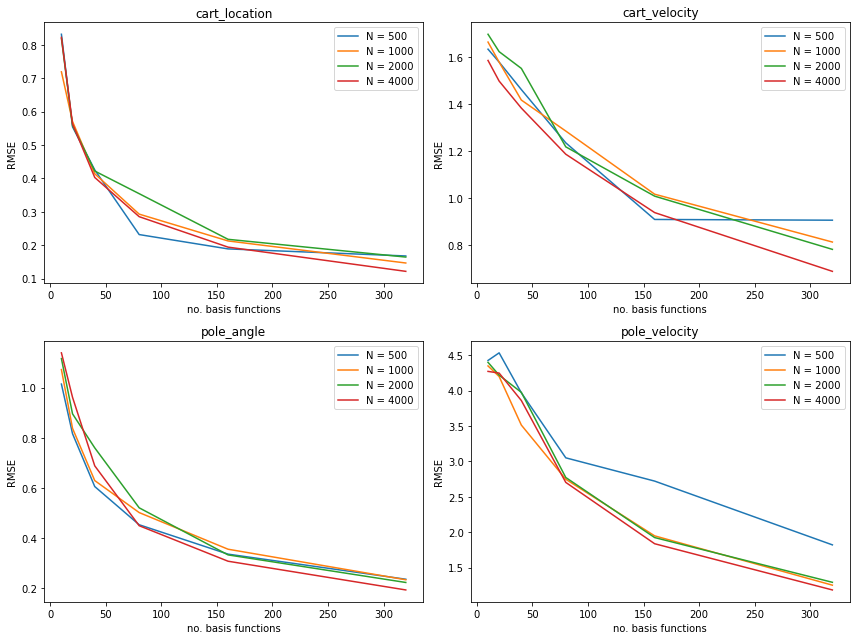

In [3]:
i_range = [10, 20, 40, 80, 160, 320] # list of no. radial basis functions to try
n_range = [500, 1000, 2000, 4000] # list of sizes of dataset to try

fig,axs = plt.subplots(2,2,figsize=(12,9))
for n in n_range:
    x,y = generate_data(n)
    x_train, y_train, x_test, y_test = x[:int(n*train_proportion)], y[:int(n*train_proportion)], x[int(n*train_proportion):], y[int(n*train_proportion):]
    sigma = np.std(x_train, axis=0)
    
    RMSE = None
    
    for i in i_range:
        alpha, X_i_vals = train_alpha(x_train, y_train, i, sigma, n, train_proportion)
        predictions = predict(x_test, alpha, X_i_vals, sigma)
        RMSE_ = np.array(display_RMSE(predictions, y_test))
        
        try:
            RMSE = np.vstack((RMSE, RMSE_))
        except:
            RMSE = RMSE_
    for j in range(4):
        axs[int(round((j+1)/4,0)),j%2].plot(i_range, RMSE[:,j], label='N = {}'.format(str(n)))
        axs[int(round((j+1)/4,0)),j%2].legend()
        axs[int(round((j+1)/4,0)),j%2].set_title(index_to_variable[j])
        axs[int(round((j+1)/4,0)),j%2].set_xlabel('no. basis functions')
        axs[int(round((j+1)/4,0)),j%2].set_ylabel('RMSE')
fig.tight_layout()
# plt.savefig(plot_path + 'convergence_of_non_linear_model')

## Plot model predictions vs actual values

In [4]:
x,y = generate_data(n)
x_train, y_train, x_test, y_test = x[:int(n*train_proportion)], y[:int(n*train_proportion)], x[int(n*train_proportion):], y[int(n*train_proportion):]
sigma = np.std(x_train, axis=0)

alpha, X_i_vals = train_alpha(x_train, y_train, no_RBC, sigma, n, train_proportion)
predictions = predict(x_test, alpha, X_i_vals, sigma)

C:\Users\Jordan\Anaconda3\lib\site-packages\autograd\tracer.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return f_raw(*args, **kwargs)


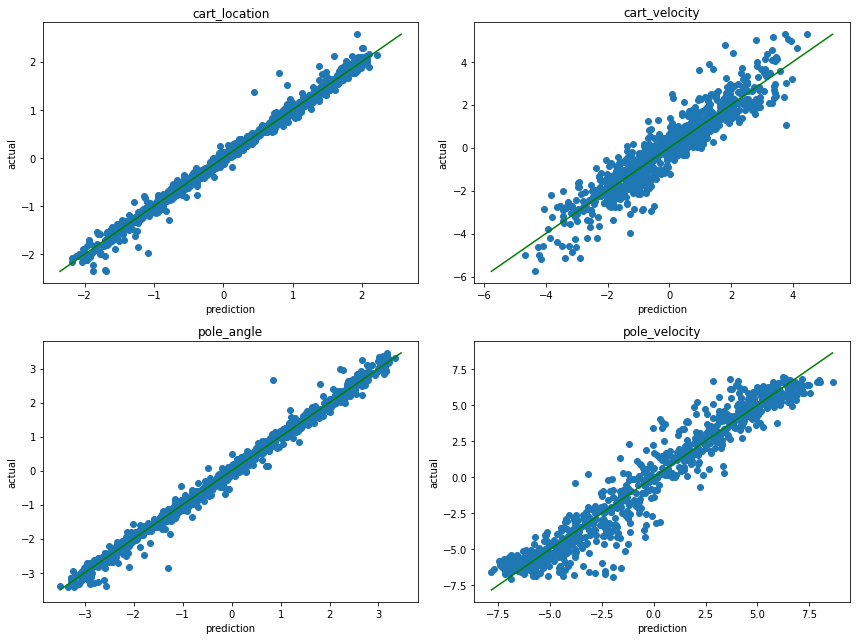

In [5]:
fig,axs = plt.subplots(2,2,figsize=(12,9))
for j in range(4):
    ul = max(max(predictions[:,j]), max(y_test[:,j]))
    ll = min(min(predictions[:,j]), min(y_test[:,j]))
    axs[int(round((j+1)/4,0)),j%2].scatter(predictions[:,j], y_test[:,j])
    axs[int(round((j+1)/4,0)),j%2].plot([ll,ul],[ll,ul], color='g')
    axs[int(round((j+1)/4,0)),j%2].set_title(index_to_variable[j])
    axs[int(round((j+1)/4,0)),j%2].set_xlabel('prediction')
    axs[int(round((j+1)/4,0)),j%2].set_ylabel('actual')
    
    fig.tight_layout()
    
# plt.savefig(plot_path + 'prediction_accuracy_with_action')

## Plot contours for non linear model

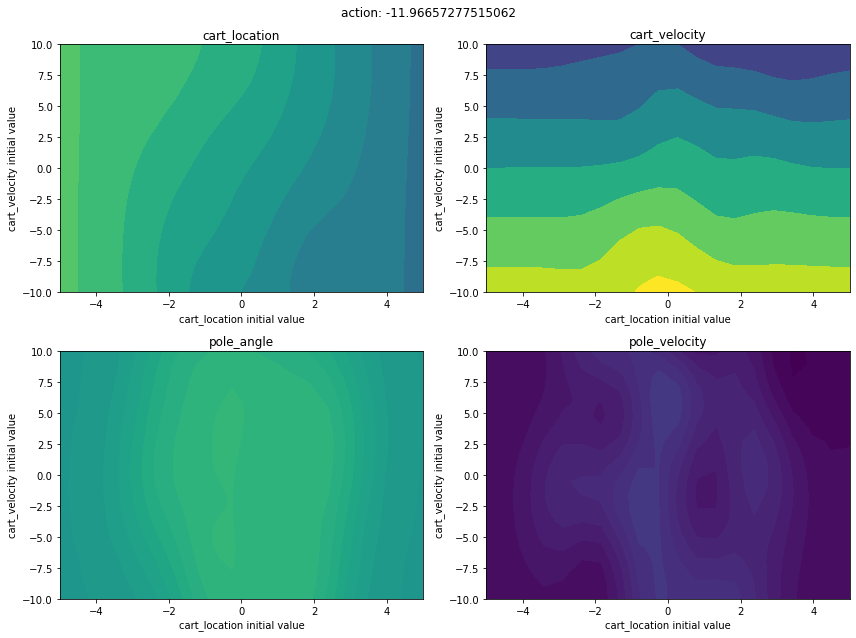

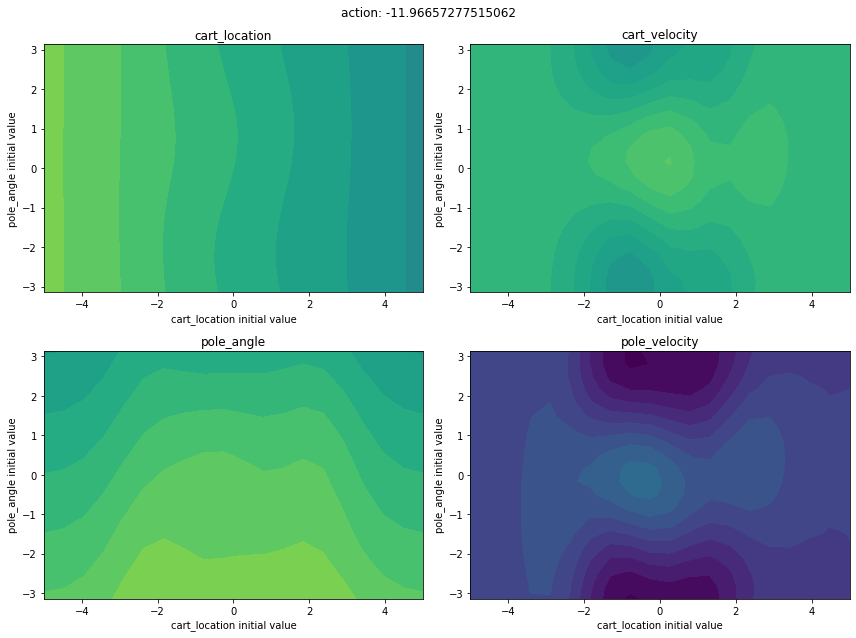

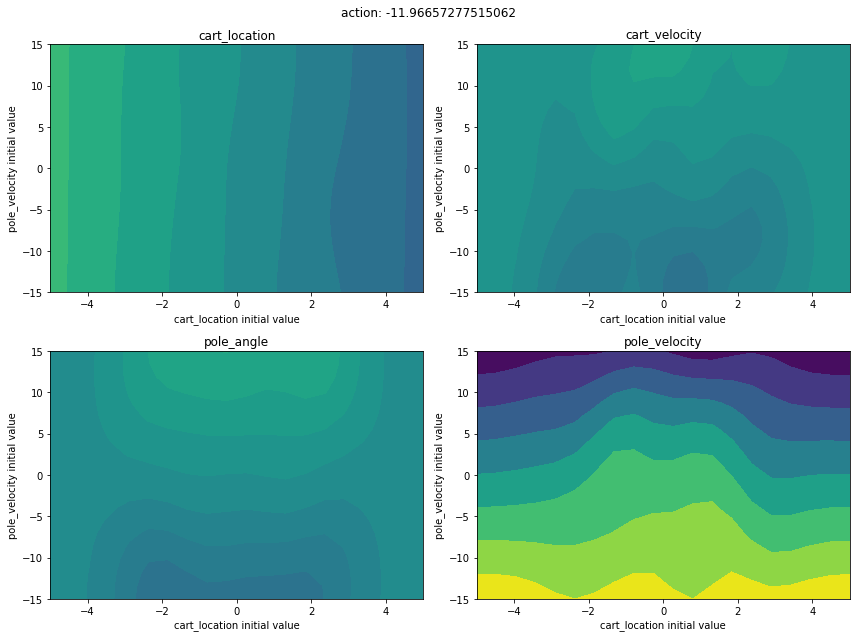

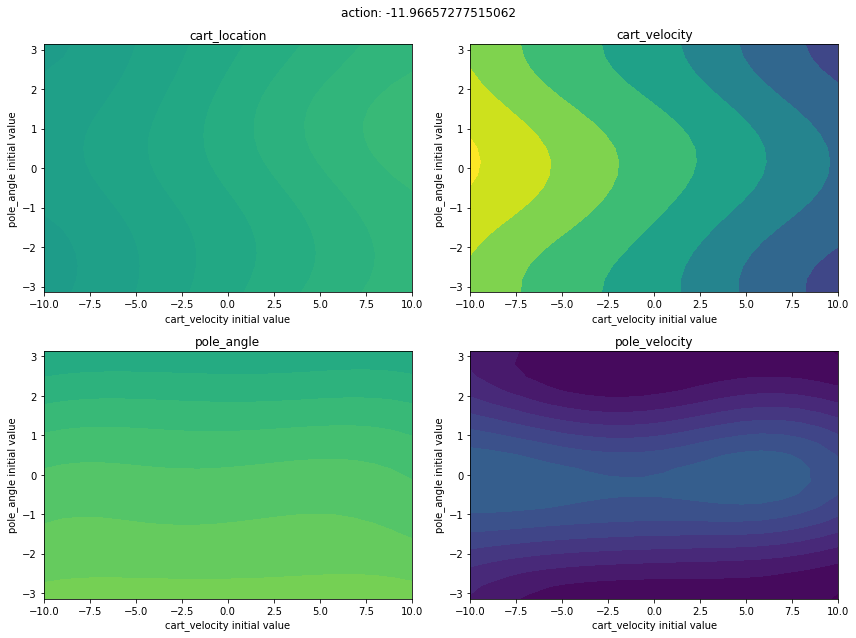

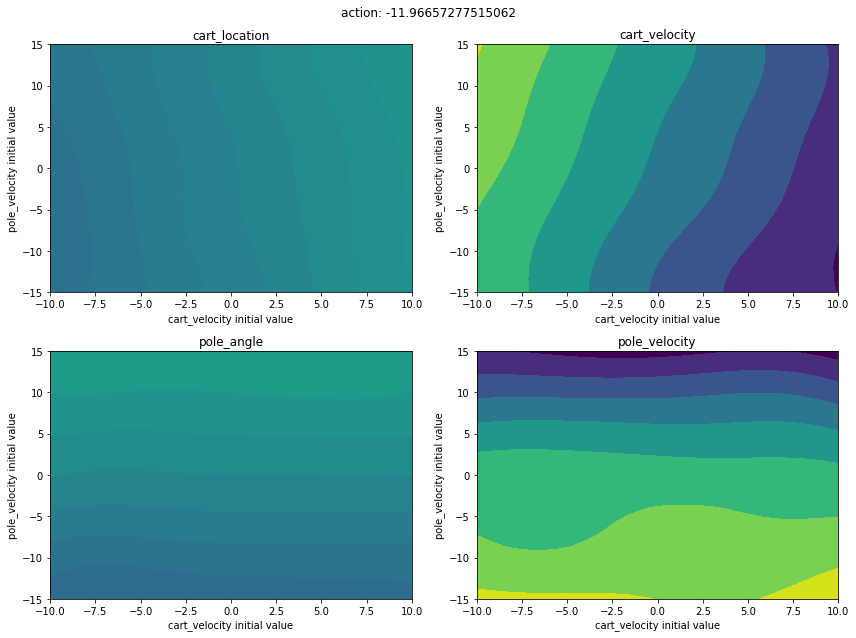

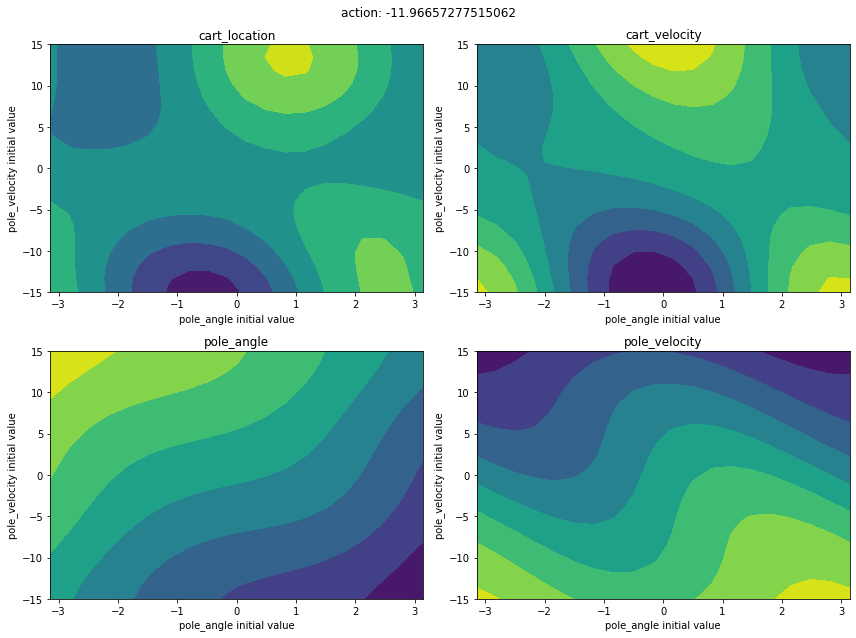

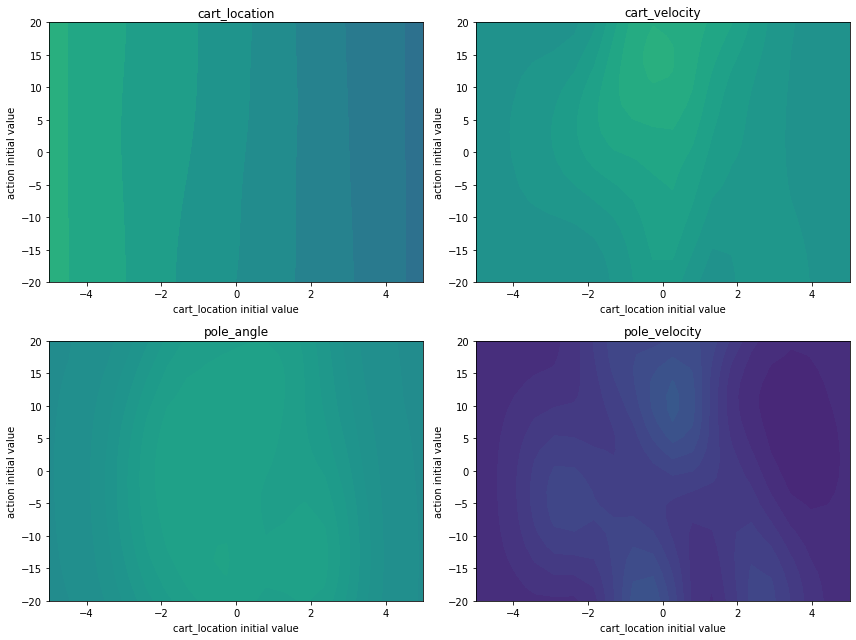

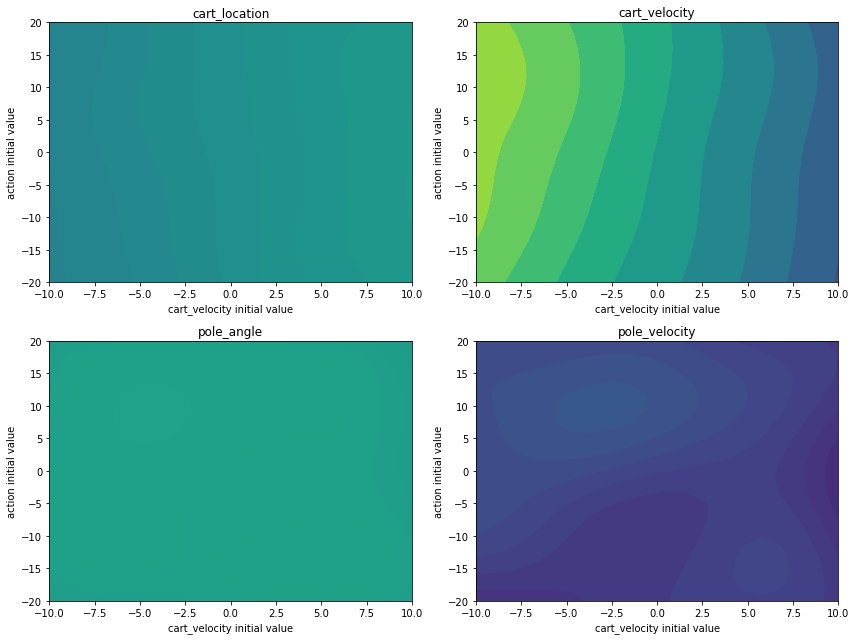

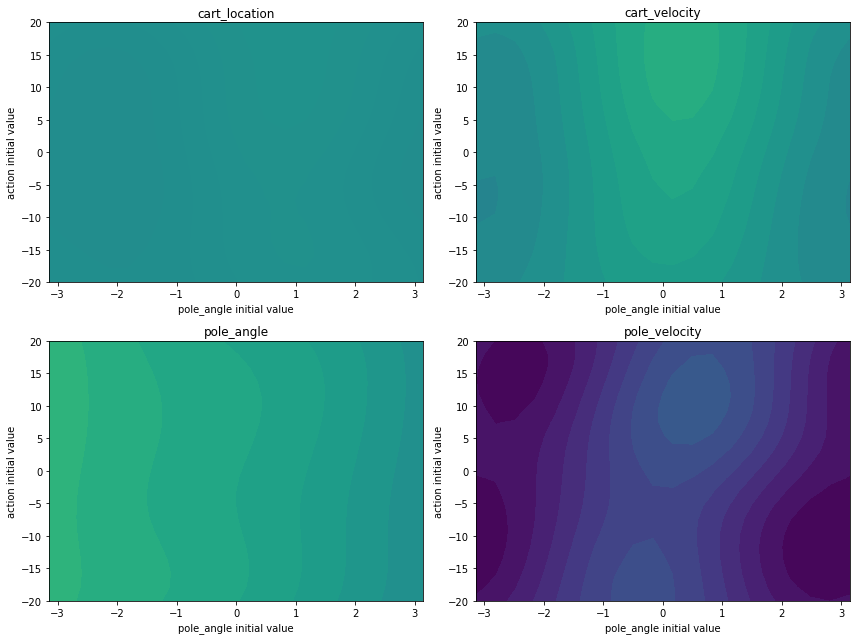

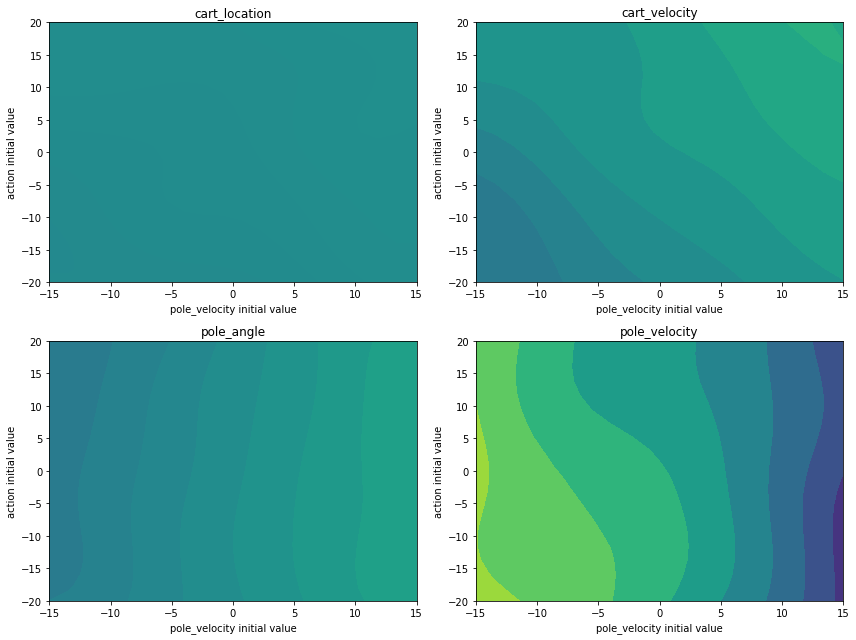

In [6]:
for index_pair in index_pair_list:
    plot_y_contour_as_difference_in_x(x_test[0], index_pair, range_x_pair_finder(index_pair, x_range_for_index), 
                                      index_to_variable, dynamics='predicted', model=predict, alpha=alpha, 
                                      X_i_vals=X_i_vals, sigma=sigma)
#     plt.savefig(plot_path+'contour_plot_predictions_with_action'+str(index_pair))
#     plt.close()

## Testing different values of lambda

action in project_x_using_model step 0 was 16.831448831585767
action in project_x_using_model step 1 was 16.831448831585767
action in project_x_using_model step 2 was 16.831448831585767
action in project_x_using_model step 3 was 16.831448831585767
action in project_x_using_model step 4 was 16.831448831585767
action in project_x_using_model step 5 was 16.831448831585767
action in project_x_using_model step 6 was 16.831448831585767
action in project_x_using_model step 7 was 16.831448831585767
action in project_x_using_model step 8 was 16.831448831585767
action in project_x_using_model step 9 was 16.831448831585767
action in project_x_using_model step 0 was 16.831448831585767
action in project_x_using_model step 1 was 16.831448831585767
action in project_x_using_model step 2 was 16.831448831585767
action in project_x_using_model step 3 was 16.831448831585767
action in project_x_using_model step 4 was 16.831448831585767
action in project_x_using_model step 5 was 16.831448831585767
action i

Text(0.5, 1.0, 'RMSE error for different values of lambda')

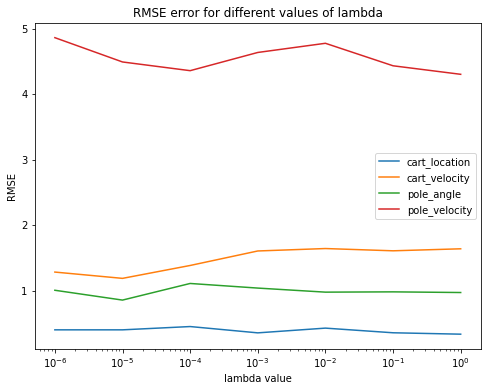

In [7]:
n = 500
x,y = generate_data(n)
x_train, y_train, x_test, y_test = x[:int(n*train_proportion)], y[:int(n*train_proportion)], x[int(n*train_proportion):], y[int(n*train_proportion):]
sigma = np.std(x_train, axis=0)
initial_x = x_test[0]

RMSE_data = []
for lam in [0.1**i for i in range(7)]:
    alpha, X_i_vals = train_alpha(x_train, y_train, 40, sigma, n, train_proportion, lam=lam)

    prediction_history, y_history = project_x_using_model(x[0], predict, steps=10, remap_angle=False, alpha=alpha, 
                                                           X_i_vals=X_i_vals, sigma=sigma)
    RMSE_data.append(display_RMSE(prediction_history, y_history))
    
RMSE_data = np.array(RMSE_data)

fig,ax = plt.subplots(1,1,figsize=(8,6))
for j in range(4):
    ax.plot([0.1**i for i in range(7)], RMSE_data[:,j], label=index_to_variable[j])
ax.legend()
ax.set_xscale('log')
ax.set_xlabel('lambda value')
ax.set_ylabel('RMSE')
ax.set_title('RMSE error for different values of lambda')
# plt.savefig(plot_path + 'RMSE_different_lambda')

## Rollout with model prediction

[-0.22386829  8.82970651  3.0987115   8.55398747]


C:\Users\Jordan\Anaconda3\lib\site-packages\autograd\tracer.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return f_raw(*args, **kwargs)


action in project_x_using_model step 0 was 0.6297938040732198
action in project_x_using_model step 1 was 0.6297938040732198
action in project_x_using_model step 2 was 0.6297938040732198
action in project_x_using_model step 3 was 0.6297938040732198
action in project_x_using_model step 4 was 0.6297938040732198
action in project_x_using_model step 5 was 0.6297938040732198
action in project_x_using_model step 6 was 0.6297938040732198
action in project_x_using_model step 7 was 0.6297938040732198
action in project_x_using_model step 8 was 0.6297938040732198
action in project_x_using_model step 9 was 0.6297938040732198


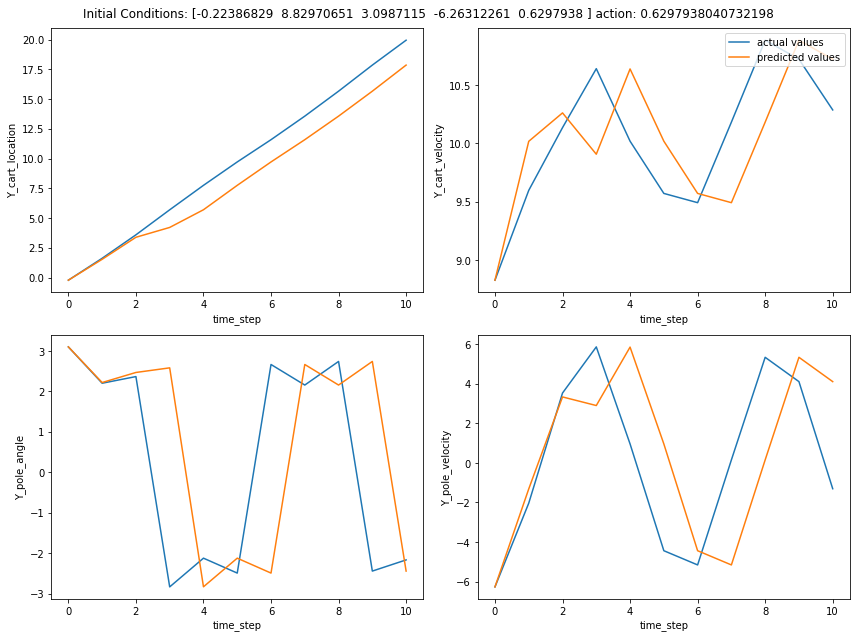

In [8]:
steps = 10

oscillating_initial_condition = np.array([x_test[0][i] if i != 3 else np.random.uniform(5,10) for i in range(4)])
print(oscillating_initial_condition)

sigma = np.std(x_train, axis=0)
alpha, X_i_vals = train_alpha(x_train, y_train, no_RBC, sigma, n, train_proportion)

prediction_history, y_history = project_x_using_model(x_test[0], predict, steps=steps, remap_angle=False, 
                                                      compound_predictions=False, alpha=alpha, 
                                                      X_i_vals=X_i_vals, sigma=sigma)

prediction_history[:,2] = np.array([remap_angle(angle) for angle in prediction_history[:,2]])
y_history[:,2] = np.array([remap_angle(angle) for angle in y_history[:,2]])

plot_prediction_vs_actual_over_time(prediction_history, y_history, title='Initial Conditions: {}'.format(x_test[0]))
# plt.savefig(plot_path + 'model_rollout_prediction_with_action_{}_steps'.format(steps))

## Model performance scanning over 1 variable

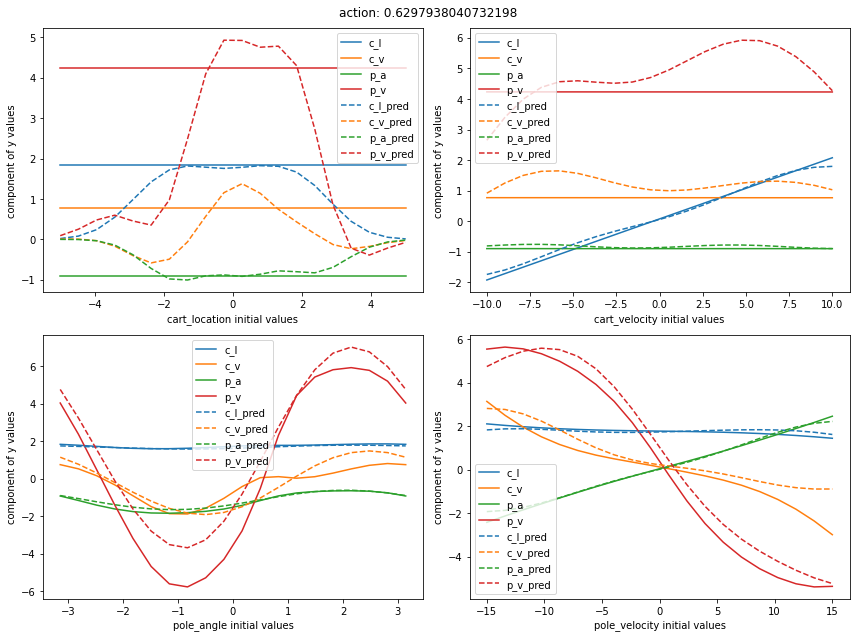

In [9]:
plot_y_scans(x_test[0], index_to_variable, x_range_for_index, predict, alpha=alpha, 
             X_i_vals=X_i_vals, sigma=sigma)
# plt.savefig(plot_path + 'model_accuracy_scan_over_1_variable_with_action')

## Introducing the loss function

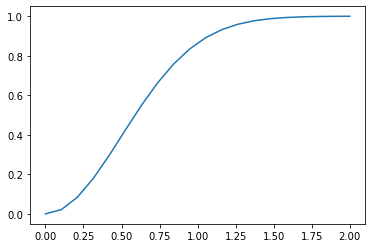

In [10]:
plt.plot(np.linspace(0,2,20), [loss([0,0,i,0]) for i in np.linspace(0,2,20)])

Text(0, 0.5, 'loss')

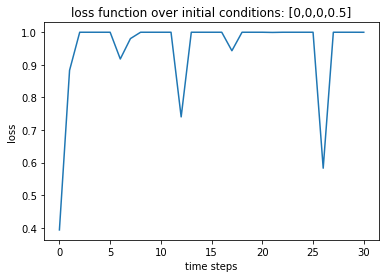

In [11]:
steps = 30
loss_history, y_history = project_loss([0,0,0,0.5,0.0], steps = steps)

plt.plot([i for i in range(steps+1)], loss_history)
plt.title('loss function over initial conditions: [0,0,0,0.5]')
plt.xlabel('time steps')
plt.ylabel('loss')
# plt.savefig(plot_path + 'loss_function_over_time')

0.9606941565358147


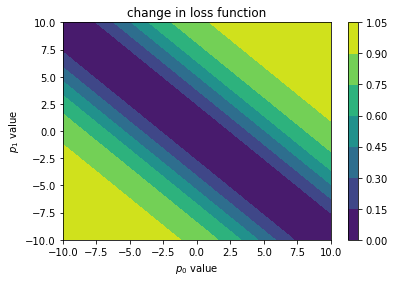

0.9607892361054918


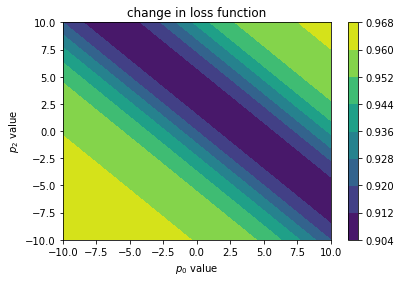

0.9607280503431901


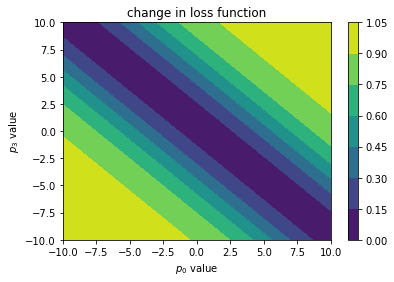

0.960789197168874


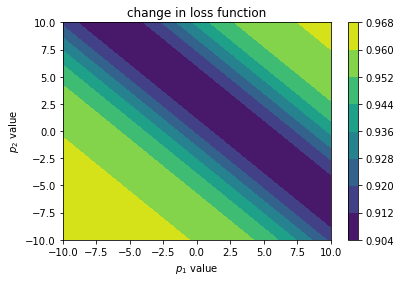

0.9607196063735393


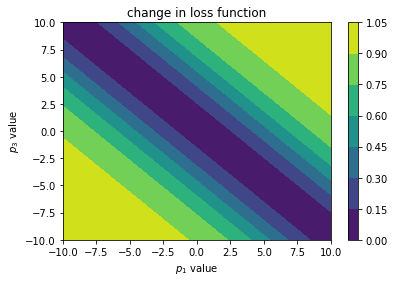

0.9607893954523937


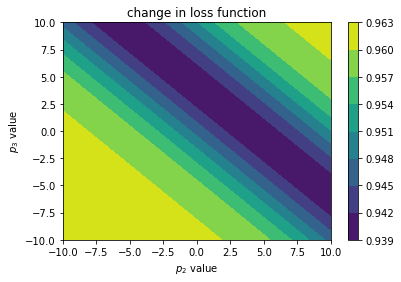

In [12]:
for index_pair in [index_pair for index_pair in index_pair_list if 4 not in index_pair ]:
    x_ = np.zeros(5)
    x_[index_pair] += 0.1
    plot_loss_contours(x_, [0,0,0,0], index_pair, [np.linspace(-10,10,10)]*2, index_to_variable)
    plt.show()

### Optimise the linear matrix P

In [13]:
linear_training_data = np.random.normal(0,0.2,(10,5))

In [14]:
p = scipy.optimize.minimize(training_loss, 
                        np.random.randint(0,1,4), 
                        args=(linear_training_data))['x']

for initial_x values any larger than roughly 0.5, the function converges on a local minimum of [0,0,0,0].

for initial_x values in the range -0.5, 0.5, the function converges on suitable values of p.

Crucially, the P values found depend heavily on the initial_x values

## Control against real dynamics

p: [ -4.37291198  -3.96372151 136.18442745  19.58050684]


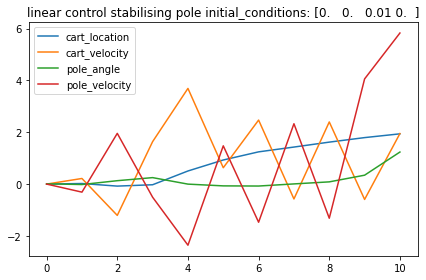

In [15]:
steps = 10
print('p:', p)

x_ = [0,0,0.01,0,0]
x_history = [x_.copy()]
for step in range(steps):
    action_ = np.dot(p, x_[:-1])
    x_[-1] = action_
    x_ = np.array(move_cart(x_, steps=1, display_plots=False, remap_angle=False))  
    x_history.append(x_)
    
x_history = np.array(x_history)

fig, ax = plt.subplots(1, 1)

for i in [0,1,2,3]:
    ax.plot([i for i in range(steps+1)], [x[i] for x in x_history], label=index_to_variable[i])
ax.set_title('linear control stabilising pole initial_conditions: {}'.format(np.round(x_history[0][:-1],3)))
ax.legend()
fig.tight_layout()
# plt.savefig(plot_path + 'linear_control_pole_stabilising_real_dynamics_rollout')

Kind of stabilises

## Control against predicted dynamics (non linear model)

p: [ -4.37291198  -3.96372151 136.18442745  19.58050684]


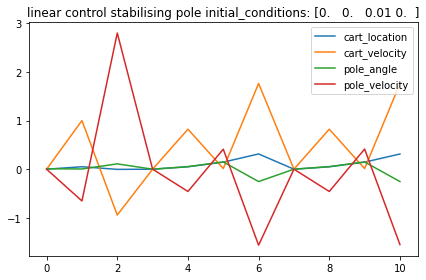

In [16]:
steps = 10
print('p:', p)

x_ = [0,0,0.01,0,0]
x_history = [x_.copy()]
action_ = np.dot(p, x_[:-1])

for step in range(steps):
    action_ = np.dot(p, x_[:-1])
    x_[-1] = action_
    x_ = predict(np.array(x_), alpha, X_i_vals, sigma)[0].tolist()
    x_history.append(x_)
    
x_history = np.array(x_history)

fig, ax = plt.subplots(1, 1)

for i in [0,1,2,3]:
    ax.plot([i for i in range(steps+1)], [x[i] for x in x_history], label=index_to_variable[i])
ax.set_title('linear control stabilising pole initial_conditions: {}'.format(np.round(x_history[0][:-1],3)))
ax.legend()
fig.tight_layout()
# plt.savefig(plot_path + 'linear_control_pole_stabilising_model_predictions_rollout')